###Importe de base de datos

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

X: Población (en 10000 habitantes)
Y: Ganacias

1) Encontrar la solución óptima invirtiendo la matriz, calcular el ECM y graficar la regresión elegida sobre un scatter plot.

2) Predecir ganancias para 35.000 habitantes

3) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles (optativo)

###Ejercicio 1

Obtengo primero las matrices X e Y

In [2]:
valores_x = dataset[:, :1]
x = np.append(np.ones((valores_x.size, 1)), valores_x, axis = 1)
y = dataset[:, 1:]

Calculo la pseudo-inversa y obtengo la solucion optima:

In [3]:
pseudoinversa_x = np.linalg.pinv(x)
sol_op = np.matmul(pseudoinversa_x, y)
sol_op

array([[-3.89578088],
       [ 1.19303364]])

En base a esto, podemos determinar un modelo para determinar la ganancia a partir de la poblacion:

In [4]:
def calcular_ganancia_por_poblacion(x):
  return sol_op[1][0] * x + sol_op[0][0]

Con esto, calculo el ECM:

In [5]:
def ecm(valores_x, y_real):
  y_pred = []
  for x in valores_x:
    y_pred.append([calcular_ganancia_por_poblacion(x[0])])
  y_pred = np.array(y_pred)
  return np.square(np.subtract(y_real, y_pred)).mean()

ecm(valores_x, y)

8.953942751950358

Ahora, grafico:

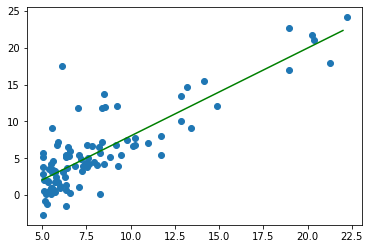

In [6]:
plt.scatter(valores_x, y) # valores reales

z = range(5, 23)
plt.plot(z, [calcular_ganancia_por_poblacion(i) for i in z], color = 'green') # prediccion

plt.show()

###Ejercicio 2

Evalúo la funcion para el modelo en 3,5 (teniendo en cuenta que la poblacion se cuenta cada 10.000 habitantes):

In [ ]:
calcular_ganancia_por_poblacion(3.5)

0.2798368763517236

###Ejercicio 3

Primero defino la función riesgo segun los X e Y:

In [ ]:
def calcular_modulo(x): 
  suma_cuadrados = 0
  for i in x:
    suma_cuadrados += i[0]**2
  return math.sqrt(suma_cuadrados)

def risk(b, w):
  modulo = calcular_modulo(np.dot(x, np.array([[b], [w]])) - y)
  return 1 / y.size * (modulo ** 2)

Text(0.5, 0, 'cost')

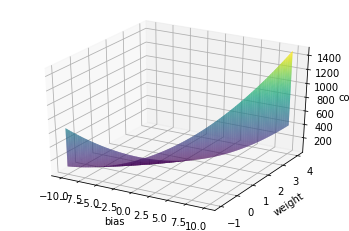

In [ ]:
pts = 100
theta0_vals = np.linspace(-10, 10, pts)
theta1_vals = np.linspace(-1, 4, pts)
J_vals = np.zeros([pts,pts])
for i in range(pts):
    for j in range(pts):
      t = np.r_[theta0_vals[i], theta1_vals[j]]
      J_vals[i,j] = np.mean((np.dot(x,t)-dataset[:,1])**2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('bias')
ax.set_ylabel('weight')
ax.set_zlabel('cost')

-----------------------

###Ejercicio 4

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='MeanSquaredError')
hist = model.fit(x=valores_x, y=y, batch_size = 97, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 180ms/step - loss: 56.7368
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 30.3360
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 19.3595
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 14.7895
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8805
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0768
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7322
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5784
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5040
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4625
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - loss: 11.4349
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4131
Epoch 13/100
1/1 [=======================

In [ ]:
###HASTA CONVERGENCIA
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='MeanSquaredError')
hist = model.fit(x=valores_x, y=y, batch_size = 97, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 459ms/step - loss: 10.2454
Epoch 2/100000
1/1 [==============================] - 0s 18ms/step - loss: 10.2361
Epoch 3/100000
1/1 [==============================] - 0s 7ms/step - loss: 10.2269
Epoch 4/100000
1/1 [==============================] - 0s 10ms/step - loss: 10.2177
Epoch 5/100000
1/1 [==============================] - 0s 10ms/step - loss: 10.2086
Epoch 6/100000
1/1 [==============================] - 0s 8ms/step - loss: 10.1996
Epoch 7/100000
1/1 [==============================] - 0s 6ms/step - loss: 10.1906
Epoch 8/100000
1/1 [==============================] - 0s 16ms/step - loss: 10.1817
Epoch 9/100000
1/1 [==============================] - 0s 14ms/step - loss: 10.1729
Epoch 10/100000
1/1 [==============================] - 0s 12ms/step - loss: 10.1641
Epoch 11/100000
1/1 [==============================] - 0s 26ms/step - loss: 10.1554
Epoch 12/100000
1/1 [==============================] - 0s 27ms/step - loss: 10.1467
Epo

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses = np.array(hist.history['loss']) #riesgo empirico
param = model.get_weights() #parametros conseguidos
prediction = model.predict(x=valores_x) #valor de x a conseguir

In [ ]:
param

[array([[1.1897696]], dtype=float32), array([-3.8632898], dtype=float32)]

###Ejercicio 5

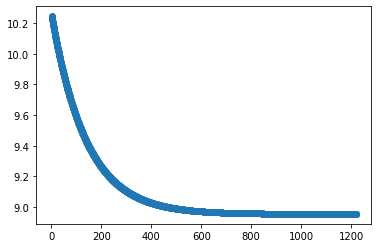

In [ ]:
epochs = np.array(range(1, 1221))

plt.scatter(epochs, losses)

plt.show()